# **Liberaries**

In [ ]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns
from sklearn.naive_bayes import GaussianNB as GuassianNB
from sklearn.naive_bayes import MultinomialNB as MultinomialNB
import warnings

# **openinig DataSet**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks (2)/Miss Aqsa Project/military expenditure.csv')
df

,country,iso3c,iso2c,year,Military expenditure (current USD),Military expenditure (% of general government expenditure),Military expenditure (% of GDP),adminregion,incomeLevel
0,Afghanistan,AFG,AF,1970,2.939586e+06,NaN,1.629606,South Asia,Low income
1,Afghanistan,AFG,AF,1971,NaN,NaN,NaN,South Asia,Low income
2,Afghanistan,AFG,AF,1972,NaN,NaN,NaN,South Asia,Low income
3,Afghanistan,AFG,AF,1973,3.341272e+06,NaN,1.868910,South Asia,Low income
4,Afghanistan,AFG,AF,1974,3.581366e+06,NaN,1.610825,South Asia,Low income
...,...,...,...,...,...,...,...,...,...
13561,Zimbabwe,ZWE,ZW,2016,3.580650e+08,7.363048,1.742494,Sub-Saharan Africa (excluding high income),Lower middle income
13562,Zimbabwe,ZWE,ZW,2017,3.405220e+08,5.519890,1.544948,Sub-Saharan Africa (excluding high income),Lower middle income
13563,Zimbabwe,ZWE,ZW,2018,4.203640e+08,5.607096,1.222795,Sub-Saharan Africa (excluding high income),Lower middle income
13564,Zimbabwe,ZWE,ZW,2019,5.469390e+08,2.099816,0.698601,Sub-Saharan Africa (excluding high income),Lower middle income


# **Data Cleaning**

In [ ]:
df.shape

(13566, 9)

In [ ]:
df.head(4)

,country,iso3c,iso2c,year,Military expenditure (current USD),Military expenditure (% of general government expenditure),Military expenditure (% of GDP),adminregion,incomeLevel
0,Afghanistan,AFG,AF,1970,2.939586e+06,NaN,1.629606,South Asia,Low income
1,Afghanistan,AFG,AF,1971,NaN,NaN,NaN,South Asia,Low income
2,Afghanistan,AFG,AF,1972,NaN,NaN,NaN,South Asia,Low income
3,Afghanistan,AFG,AF,1973,3.341272e+06,NaN,1.868910,South Asia,Low income


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13566 entries, 0 to 13565
Data columns (total 9 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   country                                                     13566 non-null  object 
 1   iso3c                                                       13464 non-null  object 
 2   iso2c                                                       13413 non-null  object 
 3   year                                                        13566 non-null  int64  
 4   Military expenditure (current USD)                          8769 non-null   float64
 5   Military expenditure (% of general government expenditure)  5282 non-null   float64
 6   Military expenditure (% of GDP)                             8777 non-null   float64
 7   adminregion                                                 6987 non-null   object 
 8

In [ ]:
df.isnull().sum()

country                                                       0
iso3c                                                         0
iso2c                                                         0
year                                                          0
Military expenditure (current USD)                            0
Military expenditure (% of general government expenditure)    0
Military expenditure (% of GDP)                               0
adminregion                                                   0
incomeLevel                                                   0
dtype: int64

In [ ]:
df.fillna(value=df['Military expenditure (current USD)'].mean() ,inplace=True)
df.fillna(value=df['Military expenditure (% of general government expenditure)'].mean(), inplace=True)
df.fillna(value=df['Military expenditure (% of GDP)'].mean(), inplace=True)


In [ ]:
df.head(4)

,country,iso3c,iso2c,year,Military expenditure (current USD),Military expenditure (% of general government expenditure),Military expenditure (% of GDP),adminregion,incomeLevel
0,Afghanistan,AFG,AF,1970,2.939586e+06,3.676065e+10,1.629606e+00,South Asia,Low income
1,Afghanistan,AFG,AF,1971,3.676065e+10,3.676065e+10,3.676065e+10,South Asia,Low income
2,Afghanistan,AFG,AF,1972,3.676065e+10,3.676065e+10,3.676065e+10,South Asia,Low income
3,Afghanistan,AFG,AF,1973,3.341272e+06,3.676065e+10,1.868910e+00,South Asia,Low income


In [ ]:
df.isnull().sum()

country                                                       0
iso3c                                                         0
iso2c                                                         0
year                                                          0
Military expenditure (current USD)                            0
Military expenditure (% of general government expenditure)    0
Military expenditure (% of GDP)                               0
adminregion                                                   0
incomeLevel                                                   0
dtype: int64

In [ ]:
# df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

country                                                       0
iso3c                                                         0
iso2c                                                         0
year                                                          0
Military expenditure (current USD)                            0
Military expenditure (% of general government expenditure)    0
Military expenditure (% of GDP)                               0
adminregion                                                   0
incomeLevel                                                   0
dtype: int64

In [ ]:
df.shape

(13566, 9)

In [ ]:
df.head(4)

,country,iso3c,iso2c,year,Military expenditure (current USD),Military expenditure (% of general government expenditure),Military expenditure (% of GDP),adminregion,incomeLevel
0,Afghanistan,AFG,AF,1970,2.939586e+06,3.676065e+10,1.629606e+00,South Asia,Low income
1,Afghanistan,AFG,AF,1971,3.676065e+10,3.676065e+10,3.676065e+10,South Asia,Low income
2,Afghanistan,AFG,AF,1972,3.676065e+10,3.676065e+10,3.676065e+10,South Asia,Low income
3,Afghanistan,AFG,AF,1973,3.341272e+06,3.676065e+10,1.868910e+00,South Asia,Low income


# **EDA**

In [ ]:


#dates since 1950
df=df[df.year >= 1950]

#create flatten it into a 3D array
def map(series):
      return list(series)

map

dfagg =df.groupby(['country']).agg({'year':map,'Military expenditure (current USD)':map,'Military expenditure (% of general government expenditure)':map,"Military expenditure (% of GDP)":map})

#filter contries to show
dfagg = dfagg[dfagg.index.isin(['Russian Federation','Ukraine','China','United States'])]


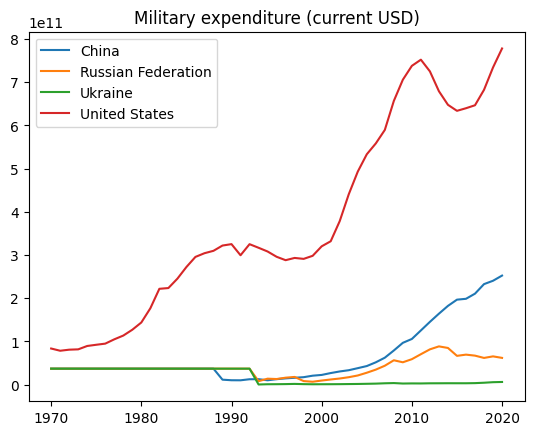

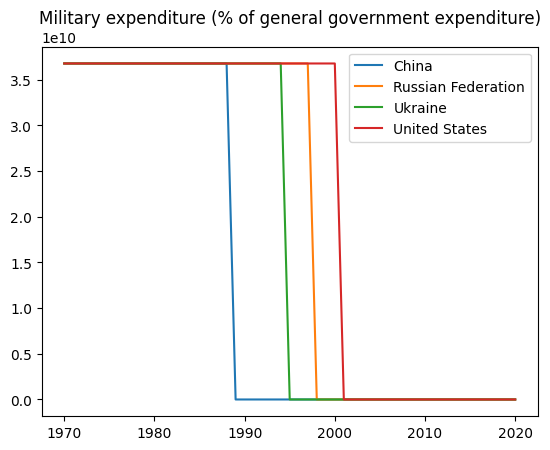

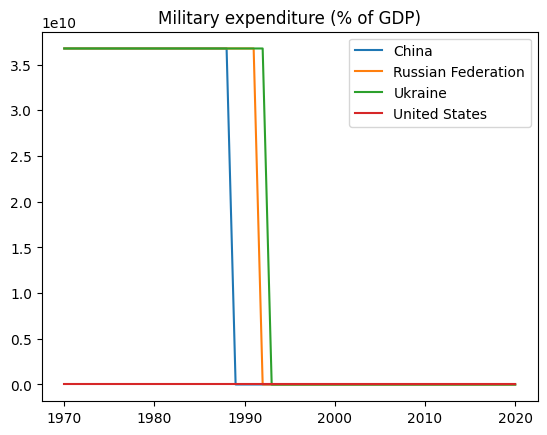

In [ ]:
for column in dfagg.columns[1:]:
    for index,row in dfagg[['year',column]].iterrows():
        plt.plot(row[0],row[1],label=index)
    plt.legend()
    plt.title(column)

    plt.show()

In [ ]:
rf = df.loc[df['incomeLevel'] != 'Aggregates', :]

In [ ]:
plt.figure(figsize=(20,8))
years = [i for i in range(df['year'].min(), df['year'].max() + 1)]
plt.grid()
world_military_expenditure = df[df['country'] == 'World']['Military expenditure (current USD)']
sns.lineplot(years, world_military_expenditure)
plt.title('Military spending around the World for 1980-2020', fontsize=18)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Spending', fontsize=18)
plt.xticks(rotation=30, fontsize=18)
plt.yticks(fontsize=18)
plt.show()

In [ ]:
max_min = rf.groupby('country').max()['Military expenditure (current USD)'] - rf.groupby('country').min()['Military expenditure (current USD)']
top_10 = max_min.nlargest(10)

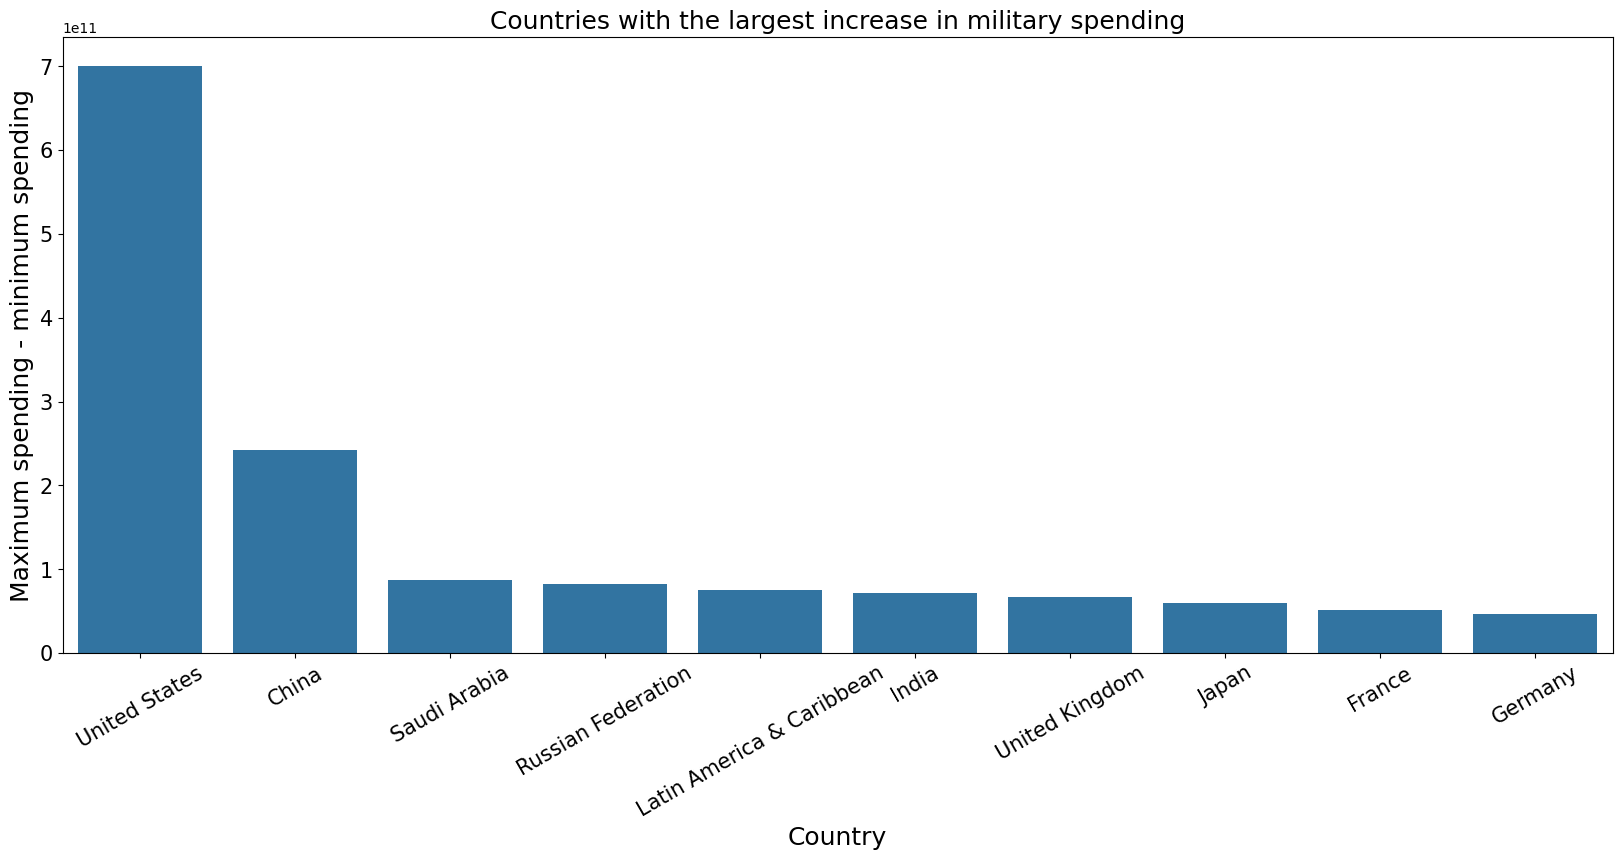

In [ ]:
plt.figure(figsize=(20, 8))
plt.title('Countries with the largest increase in military spending', fontsize=18)
plt.ylabel('Maximum spending - minimum spending', fontsize=18)
sns.barplot(x=top_10.index, y=top_10.values)
plt.xticks(rotation=30, fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Country', fontsize=18)
plt.show()

In [ ]:
top_5 = rf.groupby('country').sum()['Military expenditure (current USD)'].nlargest(5)
top_5 = list(top_5.index)

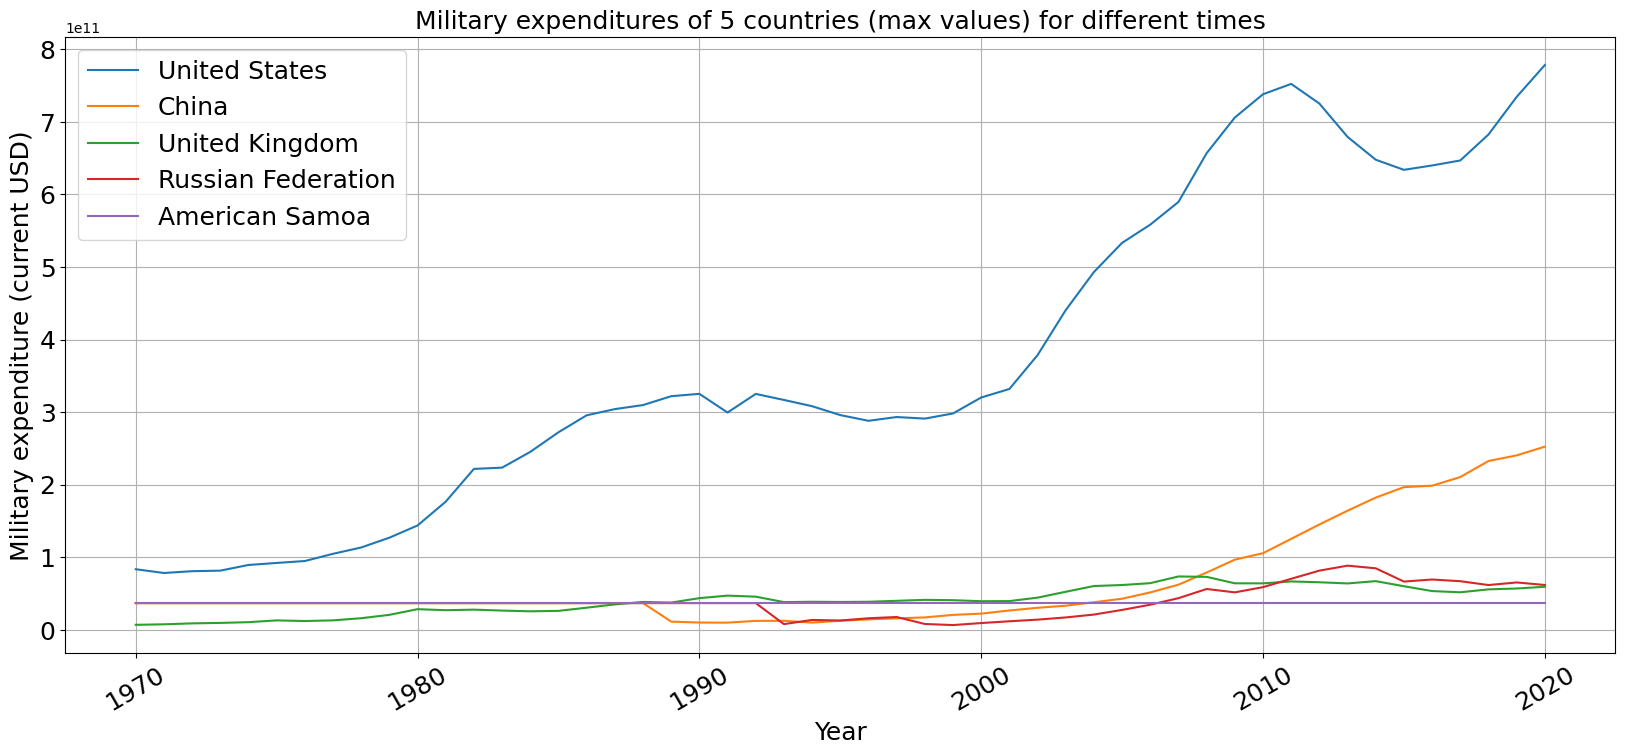

In [ ]:
def plotter_1(top_5):
    plt.figure(figsize=(20, 8))
    plt.title('Military expenditures of 5 countries (max values) for different times', fontsize=18)
    YEARS = [i for i in range(df['year'].min(), df['year'].max() + 1)]
    for top_country in top_5:
        EXPENDITURE = df.loc[df['country'] == top_country, 'Military expenditure (current USD)']
        # Create a DataFrame for sns.lineplot
        df_plot = pd.DataFrame({'Year': YEARS, 'Expenditure': EXPENDITURE.values})
        sns.lineplot(x='Year', y='Expenditure', data=df_plot, label=top_country) # Pass data as a DataFrame
    plt.legend(fontsize=18)
    plt.xticks(rotation=30, fontsize=18)
    plt.yticks(fontsize=18)
    plt.xlabel('Year', fontsize=18)
    plt.ylabel('Military expenditure (current USD)', fontsize=18)




plotter_1(top_5)
plt.grid()

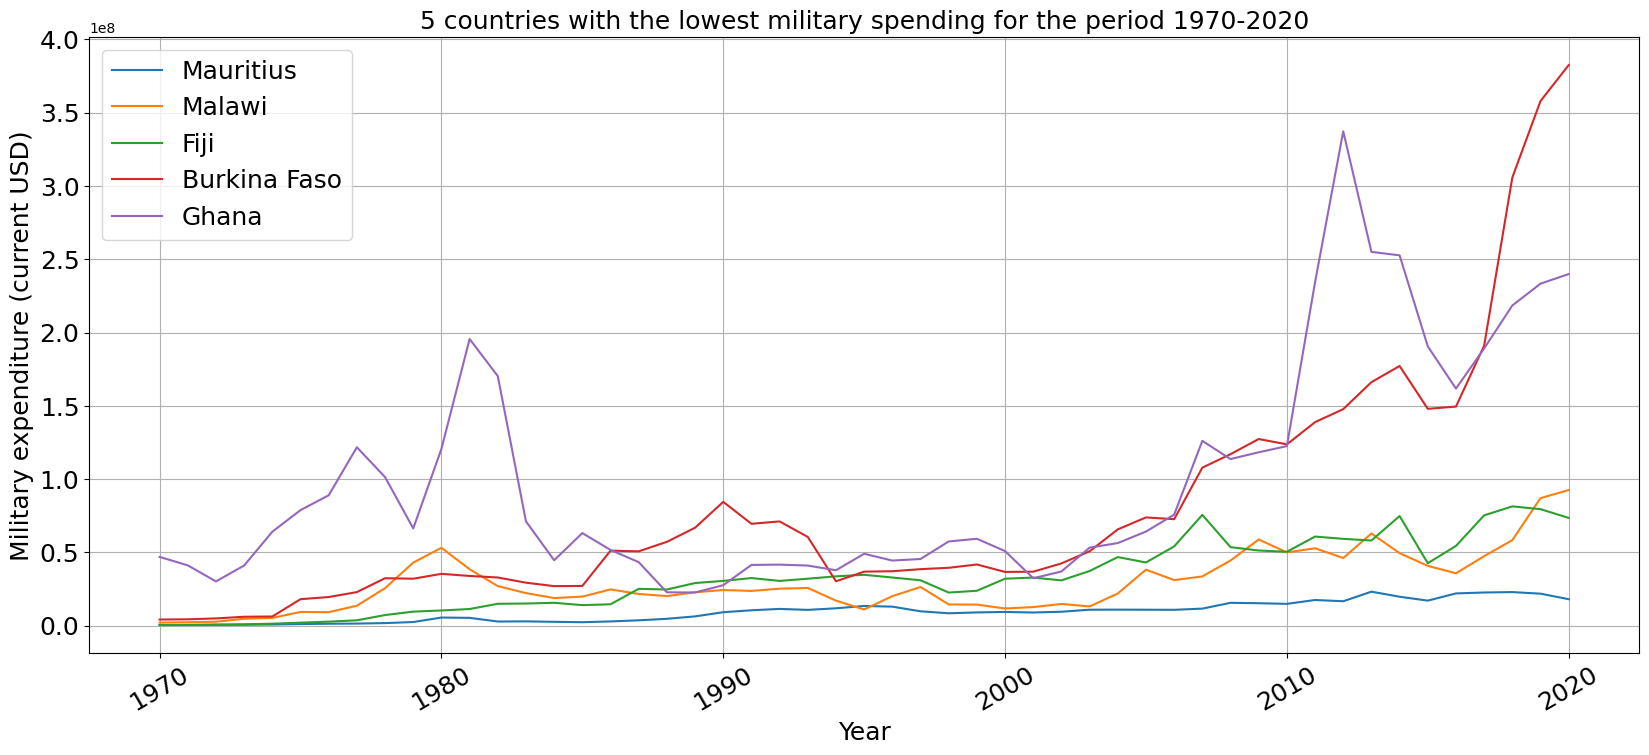

In [ ]:
def plotter_10(smallest_5):
    plt.figure(figsize=(20, 8))
    plt.title('5 countries with the lowest military spending for the period 1970-2020', fontsize=18)
    YEARS = [i for i in range(df['year'].min(), df['year'].max() + 1)]
    for top_country in smallest_5:
        EXPENDITURE = df.loc[df['country'] == top_country, 'Military expenditure (current USD)']
        # Create a DataFrame for sns.lineplot
        df_plot = pd.DataFrame({'Year': YEARS, 'Expenditure': EXPENDITURE.values})
        sns.lineplot(x='Year', y='Expenditure', data=df_plot, label=top_country) # Pass data as a DataFrame
    plt.legend(fontsize=18)
    plt.xticks(rotation=30, fontsize=18)
    plt.yticks(fontsize=18)
    plt.xlabel('Year', fontsize=18)
    plt.ylabel('Military expenditure (current USD)', fontsize=18)


plotter_10(smallest_5)
plt.grid()

In [ ]:
def plotter_2(Income, n):
    fig, ax = plt.subplots(figsize=(20, 8))
    hf = df.loc[df['incomeLevel'] == Income, ['country','Military expenditure (% of GDP)']]
    random.choices(hf['country'].tolist(), k=n)
    hf = hf.loc[hf['country'].isin(random.choices(hf['country'].tolist(), k=n)), :]
    group = hf.groupby('country')
    max_Military_expenditure = group.max()['Military expenditure (% of GDP)']
    min_Military_expenditure = group.min()['Military expenditure (% of GDP)']
    ax.set_title(f'Analysis of {Income} countries', fontsize=17)
    width = 0.3
    x = np.arange(len(max_Military_expenditure.index.tolist()))
    ax.bar(x - width/2, max_Military_expenditure.values, width=0.3, label='Maximum % of GPD')
    ax.bar(x + width/2, min_Military_expenditure.values, width=0.3, label='Maximum % of GPD')
    ax.set_xticks(x)
    ax.set_xticklabels(max_Military_expenditure.index.tolist(), rotation=90, fontsize=13)
    plt.grid()
    ax.legend(fontsize=15, loc=1)
    ax.set_xlabel('Country', fontsize=16)
    ax.set_ylabel('Military expenditure (% of GDP)', fontsize=16)
    plt.yticks(fontsize=15)
    plt.show()


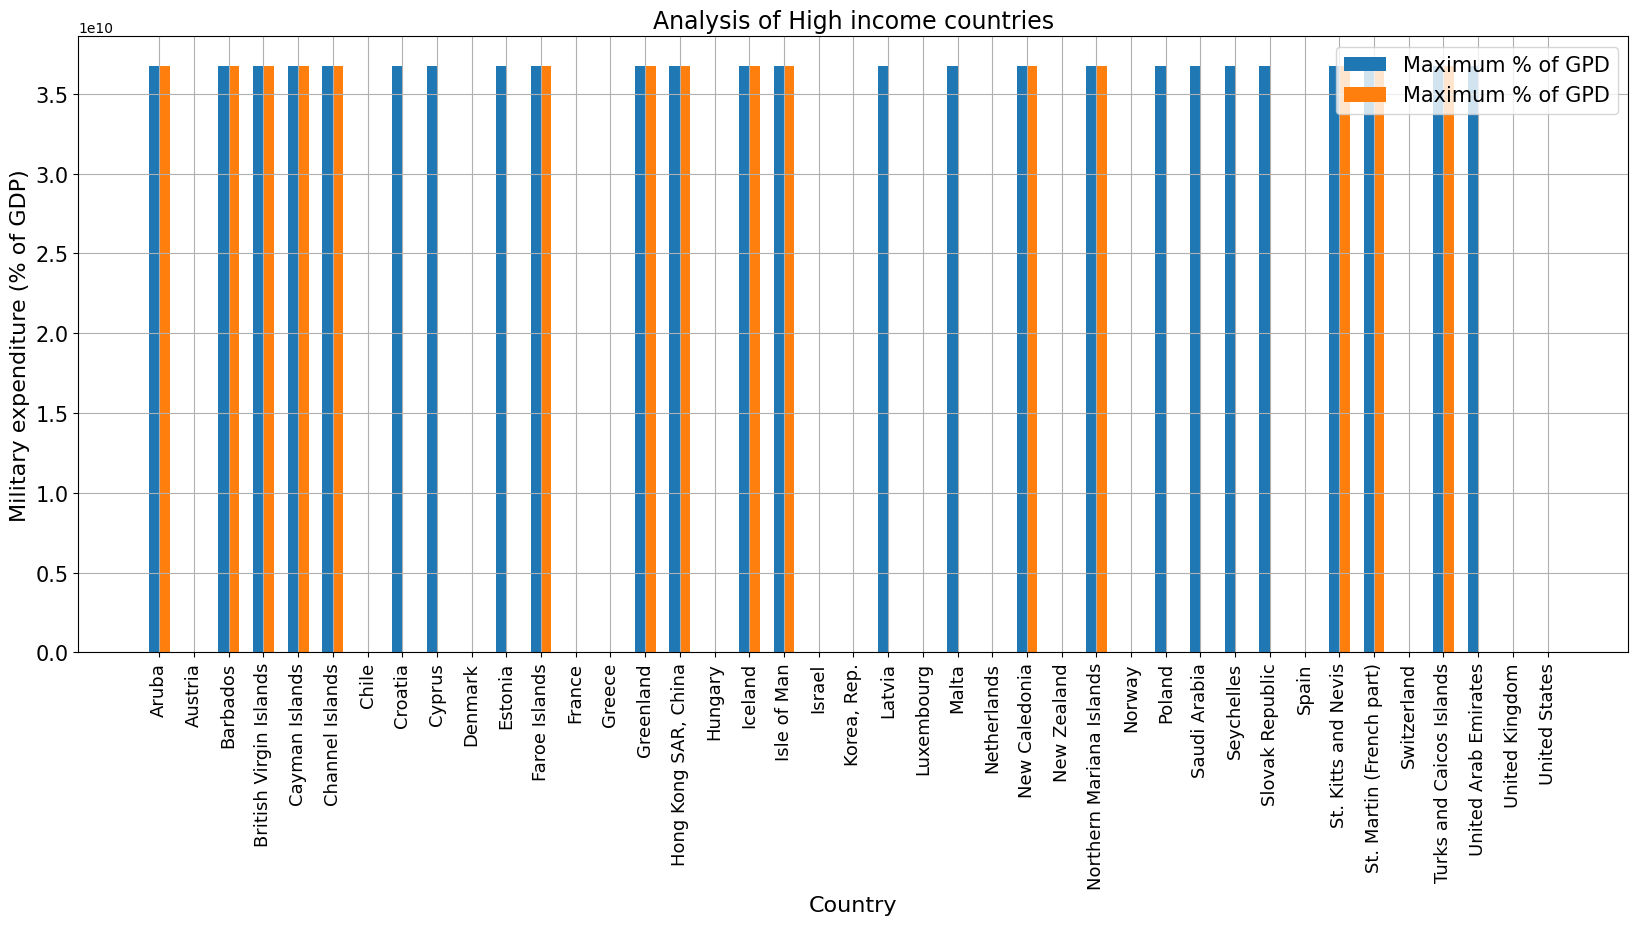

In [ ]:
plotter_2('High income', 60)

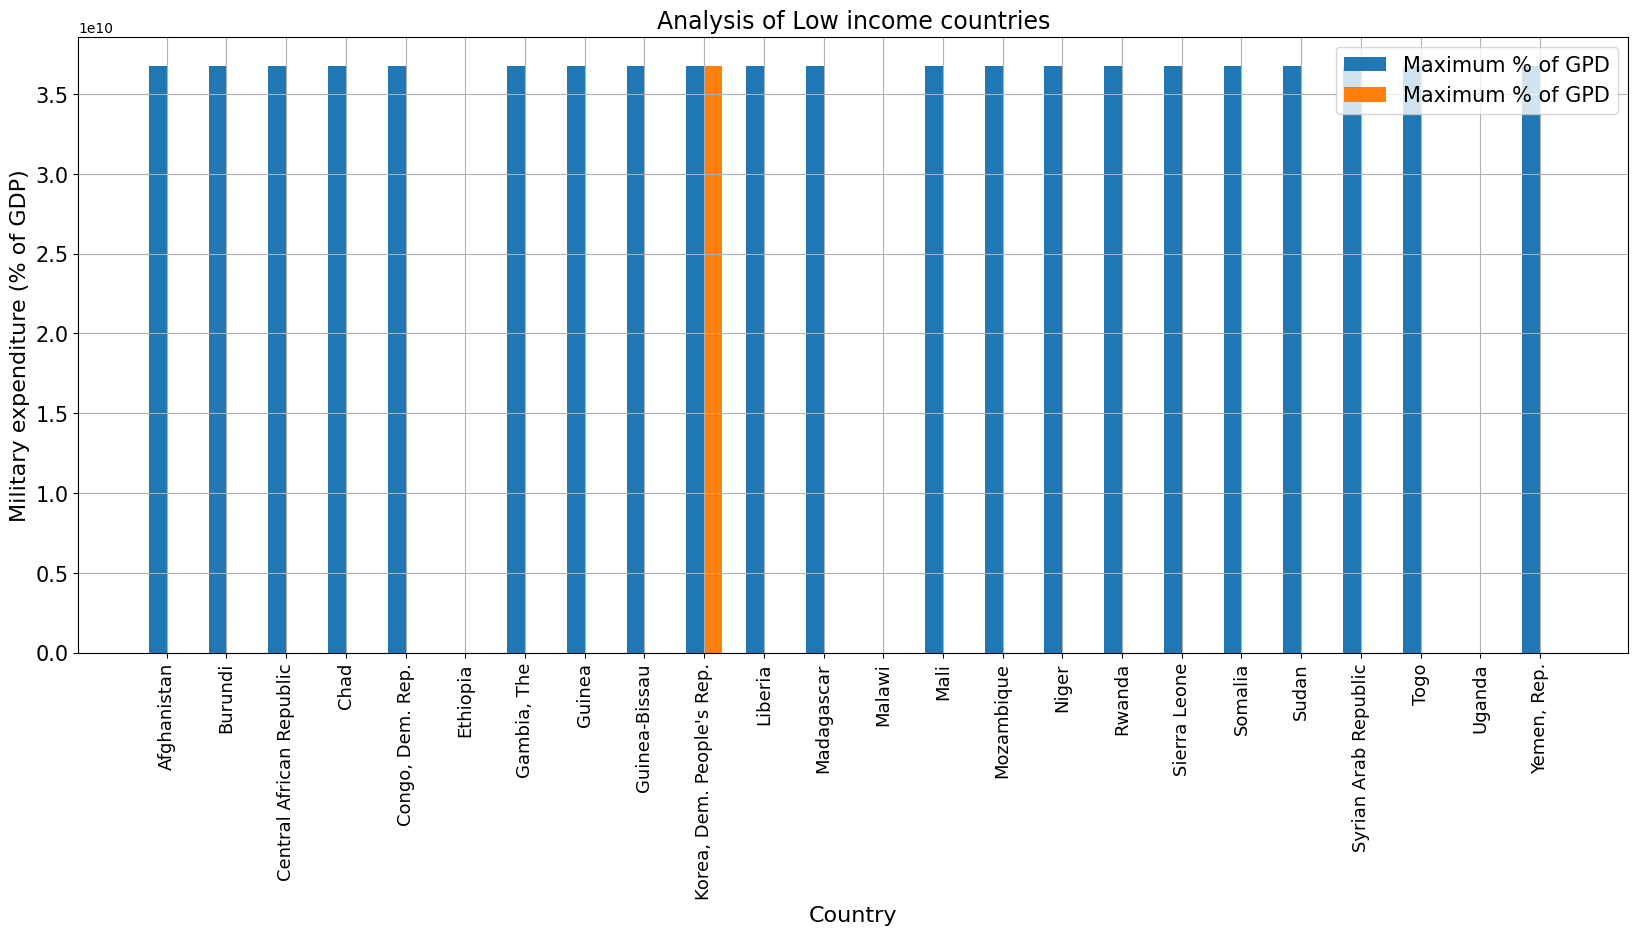

In [ ]:
plotter_2('Low income', 60)

In [ ]:
income_level_list = df['incomeLevel'].dropna().unique().tolist()
income_level_list.remove('Not classified')
income_level_list.remove('Aggregates')
income_level_list

['Low income',
 'Upper middle income',
 'Lower middle income',
 'High income',
 36760653638.93792]

In [ ]:
# Convert 'Military expenditure (current USD)' to numeric, handling errors
df['Military expenditure (current USD)'] = pd.to_numeric(df['Military expenditure (current USD)'], errors='coerce')

# Check for non-numeric values after conversion
non_numeric = df[pd.to_numeric(df['Military expenditure (current USD)'], errors='coerce').isna()]
print(non_numeric)

# Handle non-numeric values if necessary. For this example, we'll fill them with 0.
df['Military expenditure (current USD)'].fillna(0, inplace=True)

# ef = pd.DataFrame(df.groupby('incomeLevel').sum()['Military expenditure (current USD)'])
ef.drop(index=['Aggregates', 'Not classified'], inplace=True)
explode = (0.05, 0.05, 0.05, 0.05)
plt.figure(figsize=(10, 10))
plt.title('''The ratio of the total military spending of
countries with different levels of income of the population for the period 1970-2020''', fontsize=17)
plt.pie(ef['Military expenditure (current USD)'], labels=income_level_list, autopct='%1.1f%%', shadow=False,
        wedgeprops={'lw':1, 'ls':'--','edgecolor':'k'}, rotatelabels=True, explode=explode,
        colors = sns.color_palette('pastel')[0:4], textprops={'fontsize': 14})
plt.show()

Empty DataFrame
Columns: [country, iso3c, iso2c, year, Military expenditure (current USD), Military expenditure (% of general government expenditure), Military expenditure (% of GDP), adminregion, incomeLevel]
Index: []


NameError: name 'ef' is not defined

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# **KNN**

In [ ]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import math
import operator

In [ ]:
np.random.seed(1)
msk = np.random.rand(
    len(df)) < 0.7  #An array containing True(with probability 0.7) and False
train = df[msk]  #Rows having array value true
test = df[~msk]  #Rows having array value False
print('Number of observations in the training data: ', len(train))
print('Number of observations in the test data: ', len(test))

Number of observations in the training data:  9501
Number of observations in the test data:  4065


In [ ]:
train.head()

,country,iso3c,iso2c,year,Military expenditure (current USD),Military expenditure (% of general government expenditure),Military expenditure (% of GDP),adminregion,incomeLevel
0,Afghanistan,AFG,AF,1970,2.939586e+06,3.676065e+10,1.629606e+00,South Asia,Low income
2,Afghanistan,AFG,AF,1972,3.676065e+10,3.676065e+10,3.676065e+10,South Asia,Low income
3,Afghanistan,AFG,AF,1973,3.341272e+06,3.676065e+10,1.868910e+00,South Asia,Low income
4,Afghanistan,AFG,AF,1974,3.581366e+06,3.676065e+10,1.610825e+00,South Asia,Low income
5,Afghanistan,AFG,AF,1975,4.203665e+06,3.676065e+10,1.722066e+00,South Asia,Low income


In [ ]:
test.head()

,country,iso3c,iso2c,year,Military expenditure (current USD),Military expenditure (% of general government expenditure),Military expenditure (% of GDP),adminregion,incomeLevel
35,Afghanistan,AFG,AF,2005,1.227272e+08,12.689758,1.992066,South Asia,Low income
47,Afghanistan,AFG,AF,2017,1.914071e+08,3.652592,0.945227,South Asia,Low income
191,Albania,ALB,AL,2008,2.556780e+08,6.256198,1.984869,Europe & Central Asia (excluding high income),Upper middle income
192,Albania,ALB,AL,2009,1.827369e+08,4.642727,1.517217,Europe & Central Asia (excluding high income),Upper middle income
195,Albania,ALB,AL,2012,1.832047e+08,5.267900,1.487083,Europe & Central Asia (excluding high income),Upper middle income


In [ ]:
def euclideanDistance(instance1, instance2, length):
    distance = 0
    for x in range(length):
        try:
            distance += pow((int(instance1[x]) - int(instance2[x])), 2)
        except ValueError:
            # Handle non-numeric values
            distance += pow((float(instance1[x]) - float(instance2[x])), 2)
    return math.sqrt(distance)

In [ ]:
def getNeighbors(trainingSet, testInstance, k):
    distances = []  #List to store all the distance values
    length = len(testInstance) - 1
    for x in range(len(trainingSet)):
        dist = euclideanDistance(testInstance, trainingSet[x], length)  #Calculating the Euclidean Distance
        distances.append((trainingSet[x],dist))  #Appending the distance values to the 'distance' list
    distances.sort(key=operator.itemgetter(1))  #Sorting based on the disance value
    neighbors = []  #List to store all the neighbors
    for x in range(k):
        neighbors.append(distances[x][0])  #Number of neighbors is dependent on the value of k
    return neighbors

In [ ]:
x=10

In [ ]:
x?

In [ ]:
def getResponse(neighbors):
    classVotes = {}  #Dictionary to store labels with their counts
    for x in range(len(neighbors)):
        response = neighbors[x][-1]  #Label value of the neighbors
        if response in classVotes:
            classVotes[
                response] += 1  #if label value is already present increment it by 1
        else:
            classVotes[
                response] = 1  #If the label value is not yet present add it to the dictionary
    sortedVotes = sorted(
        classVotes.items(), key=operator.itemgetter(1), reverse=True
    )  #Sort the dictinary based on the count value in descending order
    return sortedVotes[0][
        0]  #Return the label with highest number of occurences

In [ ]:
def getAccuracy(testSet, predictions):
    correct = 0  #Variable to store the correct predictions
    for x in range(len(testSet)):
        if testSet[x][-1] is predictions[x]:  #Checking whether the predicted value is same as label value
            correct += 1  #Incremented when both values are same
    return (correct / float(len(testSet))) * 100.0  #Accuracy = No. of Correct pred / Total number of pred

In [ ]:
trainSet = [[5, 1, 1, 1, 2, 1, 3, 2, 1, 2],
            [10, 10, 10, 10, 5, 10, 10, 10, 7, 4]]
testInstance = [4, 8, 6, 4, 3, 4, 10, 6, 1, 2]
k = 1
neighbors = getNeighbors(trainSet, testInstance, k)
print(neighbors)

[[5, 1, 1, 1, 2, 1, 3, 2, 1, 2]]


In [ ]:
neighbors = [[5, 1, 1, 1, 2, 1, 3, 2, 1, 2], [3, 1, 1, 1, 2, 1, 2, 3, 1, 2],
             [10, 10, 10, 10, 5, 10, 10, 10, 7, 4]]
response = getResponse(neighbors)
print(response)

2


In [ ]:
testSet = [[5, 1, 1, 1, 2, 1, 3, 2, 1, 2], [3, 1, 1, 1, 2, 1, 2, 3, 1, 2],
           [10, 10, 10, 10, 5, 10, 10, 10, 7, 4]]

predictions = [2, 2, 2]
accuracy = getAccuracy(testSet, predictions)
print(accuracy)

66.66666666666666


In [ ]:
predictions = []  #List to store the predicted values
k = 3  # 3-Nearest Neighbors
trainingSet = train.values.tolist()  #List containing training data
testSet = test.values.tolist()  #List containing test data
for x in range(len(testSet)):
    neighbors = getNeighbors(trainingSet, testSet[x], k)
    result = getResponse(neighbors)
    predictions.append(result)  # Storing the predicted values
    print('> predicted=' + repr(result) + ', actual=' + repr(testSet[x][-1]))

In [ ]:
print("Confusion Matrix")
for i in testSet:
    if len(i) >= 31:
        y_test.append(i[30])
    else:
        print("Skipping data point with less than 31 elements:", i)

from sklearn.metrics import confusion_matrix, accuracy_score
res = confusion_matrix(y_test, predictions)
print(res)

In [ ]:
accuracy = accuracy_score(y_test, predictions) * 100
print('Accuracy: ' + repr(accuracy) + '%')

Accuracy: nan%


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


nan